<h1> Flow of program</h1>
<h3>Part 1 - Classification (Supervised Machine Learning)</h3>
<p>(1) - Data Understanding</p>
<p>(2) - Data Preprocessing</p>
<p>(3) - Build Models</p>
         <p><b> - XGBClassifier</b></p>
         <p><b> - Random Forest Classifier</b></p>
         <p><b> - Cat Boost Classifier</b></p>
         <p><b> - Logistic Regression</b></p>
         <p><b> - AdaBoost Classifier</b></p>
         <p><b> - Gaussian Naive Bayes</b></p>
         <p><b> - Artificial Neural Network</b></p>
<p>(4) - Build and predict using models (With imbalanced data)</p>
<p>(5) - Solve imbalanced data issue using <b>SMOTEENN</b> resampling method</p>
<p>(6) - Build and predict using models (With balanced data)</p>
<p>(7) - Build and predict using models (With hyperparameter tuning)</p>
<p>(8) - Conclusion</p>
<h3>Part 2 - Clustering (Unsupervised Machine Learning)</h3>
<p>(1) - <b>DBScan</b></p>
<p>(2) - <b>KMeans Clustering</b></p>
<p>(3) - <b>Agglomerative Clustering</b></p>

# Part 1 - Classification

<p>Objective: Perform classification on salary whether it is greater than 50k or less than 50k.</p>

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Import Libraries</p>

In [1]:
# Ignore if you have already installed imblearn module
!pip install imblearn

In [2]:
# Ignore if you have already installed hyperopt module
!pip install hyperopt

In [3]:
# Ignore if you have already installed yellowbrick module
!pip install yellowbrick

In [4]:
# Classification (Supervised Learning)
from matplotlib import pyplot
import numpy as np
np.random.seed(0) 
from numpy import array
import pandas as pd 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras_tuner
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Clustering (Unsupervised Learning)
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Load raw data</p>

In [5]:
data = pd.read_csv('salary.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Information</p>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Description</p>

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Visualization</p>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

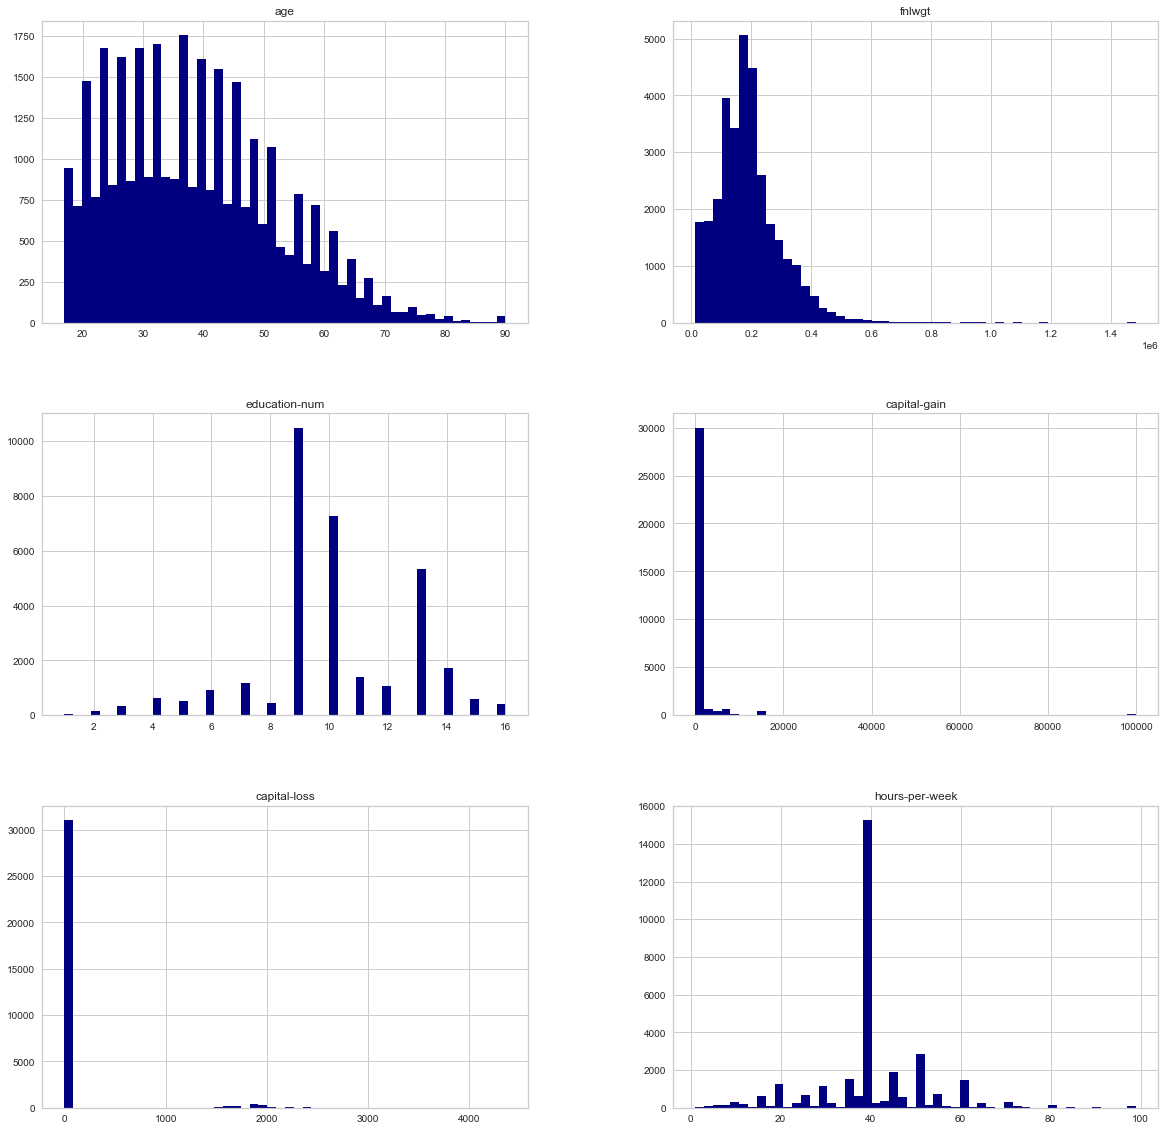

In [9]:
data.hist(bins=50, figsize=(20,20), color='navy')

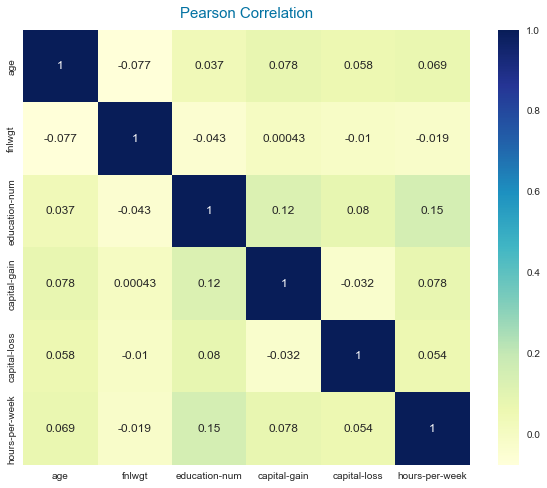

In [10]:
# Visualize the correlation using pearson correlation
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [11]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

# Data Preprocessing
- Data Transformation
- Convert all the features to categorical using LabelEncoder
- Feature selection using SelectKBest with chi square as scoring function
- Remove duplicated data
- Remove outliers
- Replace missing values with mode of column 

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Transformation</p>

In [12]:
data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


# Imbalanced Data Issue
The countplot above clearly manifests the imbalanced data issue with our dataset. There are way more data / rows with salary 1 (<= 50k) compared to salary 0 (> 50k). The ratio of the data is around 3:10. This can cause the prediction result to be biased towards salary 1, or the prediction result might even ignore the salary 0 class in certain cases. 

We will solve this imbalanced data issue later.

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

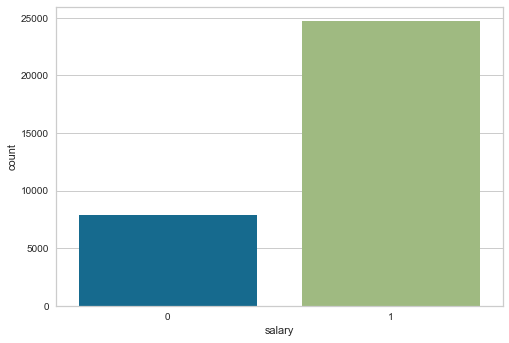

In [13]:
sns.countplot(data["salary"])

In [14]:
newData = data.replace("\?", np.nan, regex=True)

In [15]:
newData = newData.apply(LabelEncoder().fit_transform)
newData.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,1
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,1
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,1
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,1
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,1


In [16]:
# Chi square feature selection
target = newData['salary'].values

chi2_features = SelectKBest(score_func=chi2, k=8)
X_kBest_features = chi2_features.fit_transform(newData, target)
selected = chi2_features.get_support()

features = array(newData.columns.values)

print(" Feature Reduction    Features")
print(" -----------------    --------")
print("          Before   : ", features)
print("\n")
print("           After   : ", features[selected])

 Feature Reduction    Features
 -----------------    --------
          Before   :  ['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'salary']


           After   :  ['age' 'fnlwgt' 'education-num' 'relationship' 'capital-gain'
 'capital-loss' 'hours-per-week' 'salary']


In [17]:
columnsDrop = [1, 3, 5, 6, 8, 9, 13]

def removeFeature(columnsDrop):
    newData.drop(newData.columns[columnsDrop], axis=1, inplace=True)

removeFeature(columnsDrop)
newData

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week,salary
0,22,2671,12,1,25,0,39,1
1,33,2926,12,0,0,0,12,1
2,21,14086,8,1,0,0,39,1
3,36,15336,6,0,0,0,39,1
4,11,19355,12,5,0,0,39,1
...,...,...,...,...,...,...,...,...
32556,10,16528,11,5,0,0,37,1
32557,23,8080,8,0,0,0,39,0
32558,41,7883,8,4,0,0,39,1
32559,5,12881,8,3,0,0,19,1


In [18]:
featuresToBeScaled = ['age', 'fnlwgt', 'education-num', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']

scaler = MinMaxScaler()
newData = scaler.fit_transform(newData)
newData = pd.DataFrame(columns=featuresToBeScaled, data=newData, 
                                 index=data.index)

In [19]:
# Dataset after being scaled
newData

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week,salary
0,0.305556,0.123389,0.800000,0.2,0.211864,0.0,0.419355,1.0
1,0.458333,0.135169,0.800000,0.0,0.000000,0.0,0.129032,1.0
2,0.291667,0.650714,0.533333,0.2,0.000000,0.0,0.419355,1.0
3,0.500000,0.708458,0.400000,0.0,0.000000,0.0,0.419355,1.0
4,0.152778,0.894119,0.800000,1.0,0.000000,0.0,0.419355,1.0
...,...,...,...,...,...,...,...,...
32556,0.138889,0.763524,0.733333,1.0,0.000000,0.0,0.397849,1.0
32557,0.319444,0.373262,0.533333,0.0,0.000000,0.0,0.419355,0.0
32558,0.569444,0.364161,0.533333,0.8,0.000000,0.0,0.419355,1.0
32559,0.069444,0.595048,0.533333,0.6,0.000000,0.0,0.204301,1.0


In [20]:
newData.duplicated().sum()

101

In [21]:
newData.drop_duplicates(keep='first', inplace=True)

In [22]:
def filterOutliers(feature):
    Q1 = newData[feature].quantile(0.25)
    Q3 = newData[feature].quantile(0.75)
    IQR = Q3 - Q1    

    filter = (newData[feature] >= Q1 - 1.5 * IQR) & (newData[feature] <= Q3 + 1.5 * IQR)
    
    return filter

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

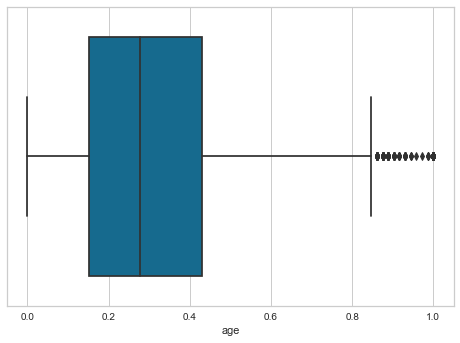

In [23]:
sns.boxplot(newData['age'])

In [24]:
newData = newData.loc[filterOutliers('age')]

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

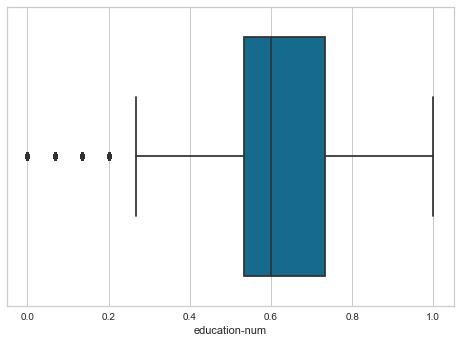

In [25]:
sns.boxplot(newData['education-num'])

In [26]:
newData = newData.loc[filterOutliers('education-num')]

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship'>

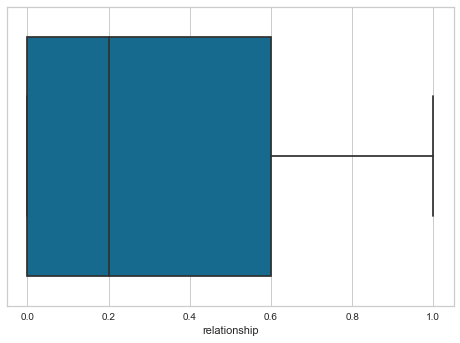

In [27]:
sns.boxplot(newData['relationship'])

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

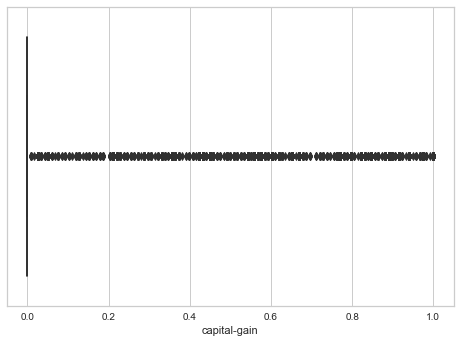

In [28]:
sns.boxplot(newData['capital-gain'])

In [29]:
newData = newData.loc[filterOutliers('capital-gain')]

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

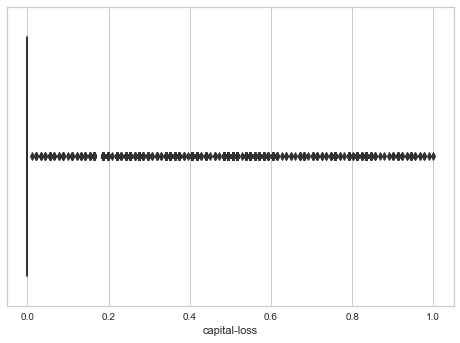

In [30]:
sns.boxplot(newData['capital-loss'])

In [31]:
newData = newData.loc[filterOutliers('capital-loss')]

C:\Users\Benon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

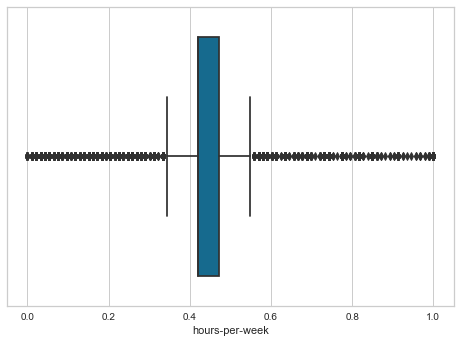

In [32]:
sns.boxplot(newData['hours-per-week'])

In [33]:
newData = newData.loc[filterOutliers('hours-per-week')]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

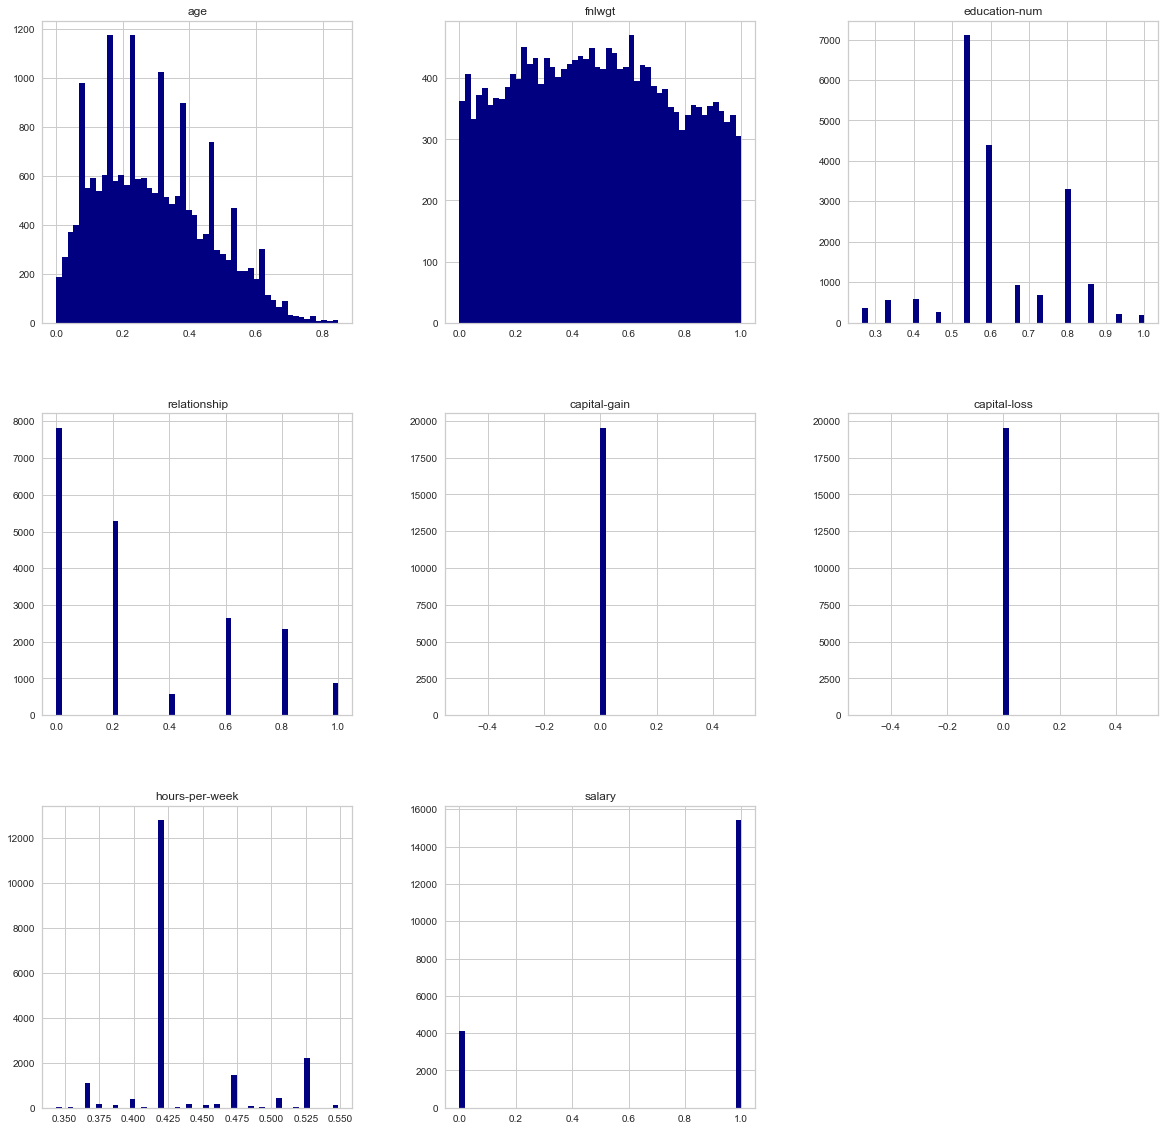

In [34]:
# After removing outliers
newData.hist(bins=50, figsize=(20,20), color='navy')

In [35]:
X = newData.iloc[:, :-1].values
y = newData.iloc[:, -1].values

In [36]:
si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

si.fit(X[:, :15])
X[:, :15] = si.transform(X[:, :15])

# Split data into train & test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Training & Prediction 
In the initial phase, we will develop our model with DEFAULT parameter and predict using the IMBALANCED training data. 

In [38]:
def classificationResults(model, yPred, yTest):
    # Classification Report
    print(classification_report(yPred, yTest))
    
    # AUC
    auc = roc_auc_score(yTest, yPred)
    print('AUC: %.3f' % auc)
    
    # ROC Curve
    ns_probs = [0 for _ in range(len(yTest))]
    
    ns_fpr, ns_tpr, _ = roc_curve(yTest, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(yTest, yPred)
    
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    # Confusion Matrix
    cm = confusion_matrix(yTest, yPred)
    sns.heatmap(cm, xticklabels=['predicted_0', 'predicted_1'], yticklabels=['actual_0', 'actual_1'],
    annot=True, fmt='d', annot_kws={'fontsize':22}, cmap="YlGnBu")

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 1 - XGB Classifier</p>

In [39]:
xg = XGBClassifier()

xg.fit(X_train, y_train)

y_predxg = xg.predict(X_test)

              precision    recall  f1-score   support

           0       0.47      0.62      0.54       616
           1       0.92      0.87      0.90      3292

    accuracy                           0.83      3908
   macro avg       0.70      0.75      0.72      3908
weighted avg       0.85      0.83      0.84      3908

AUC: 0.698


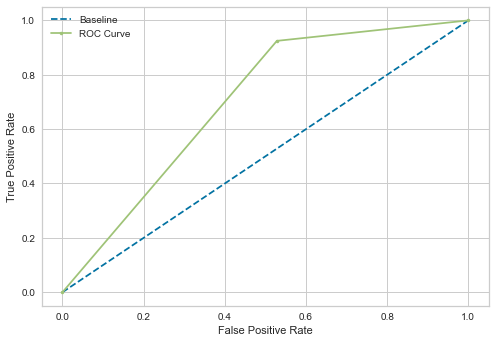

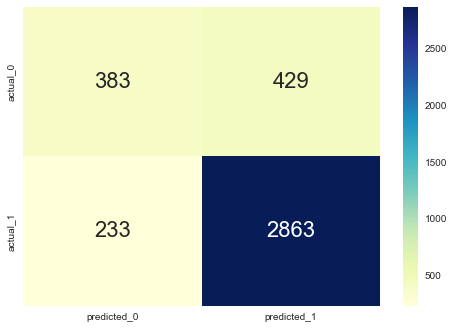

In [40]:
classificationResults(xg, y_predxg, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 2 - Random Forest Classifier</p>

In [41]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_predrf = rf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.48      0.58      0.52       670
         1.0       0.91      0.87      0.89      3238

    accuracy                           0.82      3908
   macro avg       0.69      0.72      0.71      3908
weighted avg       0.83      0.82      0.83      3908

AUC: 0.693


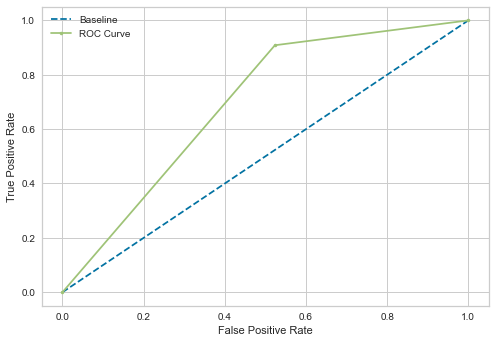

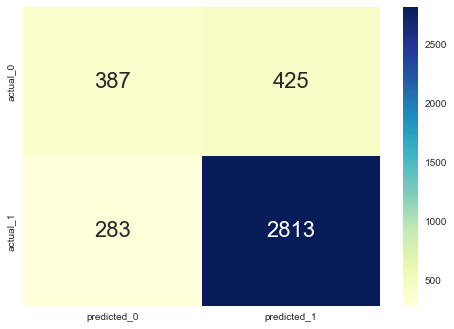

In [42]:
classificationResults(rf, y_predrf, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 3 - Cat Boost Classifier</p>

In [43]:
catt = CatBoostClassifier()

catt.fit(X_train, y_train)

y_predc = catt.predict(X_test)

Learning rate set to 0.033323
0:	learn: 0.6646360	total: 145ms	remaining: 2m 25s
1:	learn: 0.6338659	total: 149ms	remaining: 1m 14s
2:	learn: 0.6077611	total: 153ms	remaining: 50.9s
3:	learn: 0.5850986	total: 157ms	remaining: 39.1s
4:	learn: 0.5648044	total: 160ms	remaining: 31.9s
5:	learn: 0.5468123	total: 164ms	remaining: 27.1s
6:	learn: 0.5290427	total: 167ms	remaining: 23.7s
7:	learn: 0.5128243	total: 171ms	remaining: 21.2s
8:	learn: 0.4983563	total: 175ms	remaining: 19.3s
9:	learn: 0.4853252	total: 180ms	remaining: 17.8s
10:	learn: 0.4739016	total: 184ms	remaining: 16.6s
11:	learn: 0.4634580	total: 190ms	remaining: 15.6s
12:	learn: 0.4541912	total: 195ms	remaining: 14.8s
13:	learn: 0.4459234	total: 200ms	remaining: 14.1s
14:	learn: 0.4379232	total: 205ms	remaining: 13.5s
15:	learn: 0.4316657	total: 210ms	remaining: 12.9s
16:	learn: 0.4249102	total: 215ms	remaining: 12.4s
17:	learn: 0.4187004	total: 220ms	remaining: 12s
18:	learn: 0.4136108	total: 225ms	remaining: 11.6s
19:	learn: 

              precision    recall  f1-score   support

         0.0       0.46      0.64      0.53       582
         1.0       0.93      0.87      0.90      3326

    accuracy                           0.83      3908
   macro avg       0.70      0.75      0.72      3908
weighted avg       0.86      0.83      0.84      3908

AUC: 0.695


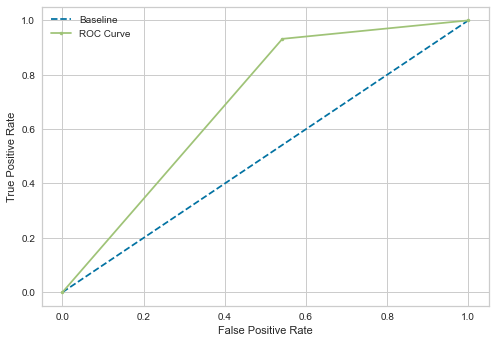

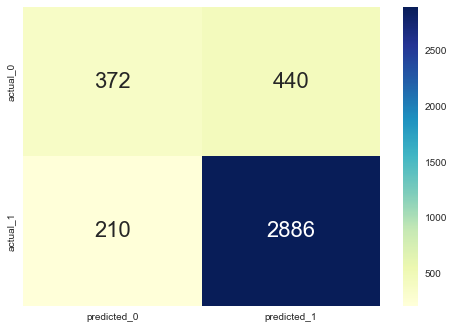

In [44]:
classificationResults(catt, y_predc, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 4 - Logistic Regression</p>

In [45]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.27      0.60      0.37       358
         1.0       0.95      0.83      0.89      3550

    accuracy                           0.81      3908
   macro avg       0.61      0.72      0.63      3908
weighted avg       0.89      0.81      0.84      3908

AUC: 0.610


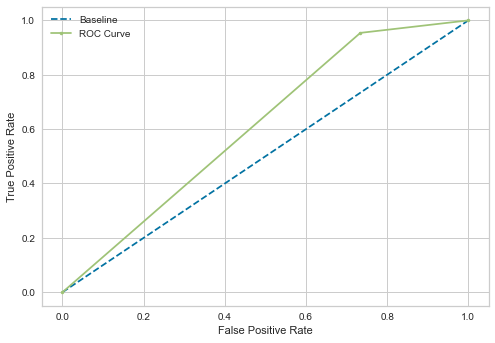

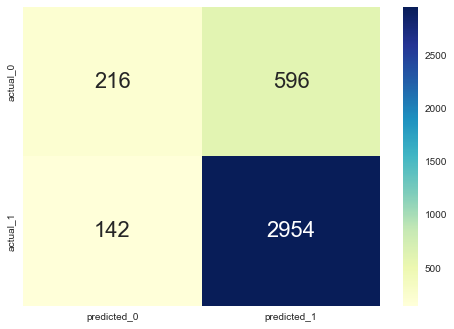

In [46]:
classificationResults(lr, prediction_lr, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 5 - Ada Boost Classifier</p>

In [47]:
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

prediction_ada = ada.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.44      0.69      0.54       524
         1.0       0.95      0.87      0.90      3384

    accuracy                           0.84      3908
   macro avg       0.69      0.78      0.72      3908
weighted avg       0.88      0.84      0.86      3908

AUC: 0.694


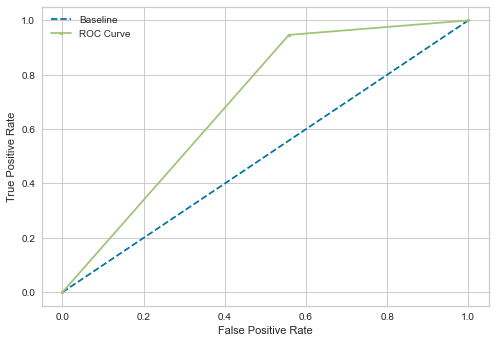

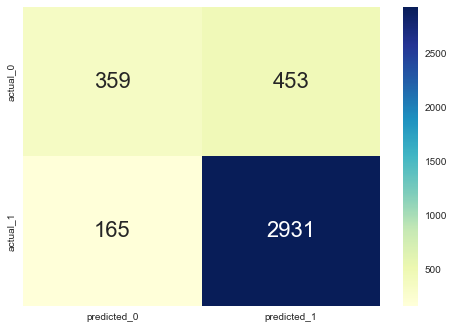

In [48]:
classificationResults(ada, prediction_ada, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 6 - Gaussian Naive Bayes</p>

In [49]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

prediction_gnb = gnb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.40      0.58      0.48       556
         1.0       0.93      0.85      0.89      3352

    accuracy                           0.82      3908
   macro avg       0.66      0.72      0.68      3908
weighted avg       0.85      0.82      0.83      3908

AUC: 0.663


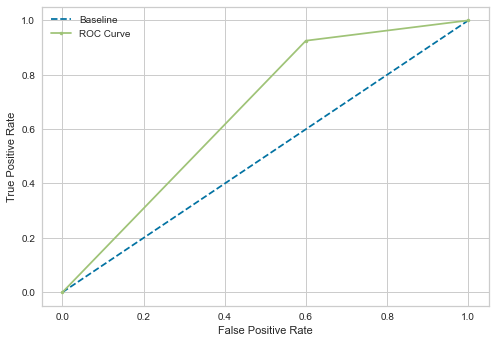

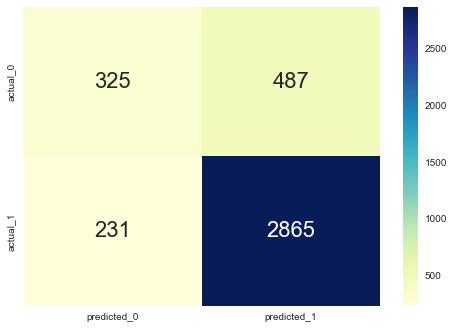

In [50]:
classificationResults(gnb, prediction_gnb, y_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model 7 - Artificial Neural Network</p>

In [51]:
# Develop ann without hyperparameter tuning
def build_ann():
    model = Sequential()

    # Input layer
    model.add(Dense(units=10, input_dim=7, kernel_initializer='uniform', activation='relu'))
    
    # Hidden Layer
    model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    
    # Output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [52]:
# Train the ann
best_model = build_ann()
ann_model = best_model.fit(X_train, y_train, epochs=200, verbose=1, shuffle=False, batch_size=64, 
                      validation_data=(X_test, y_test), validation_split=0.33)

Epoch 1/200
245/245 [==============================] - 1s 1ms/step - loss: 0.5961 - accuracy: 0.7862 - val_loss: 0.5087 - val_accuracy: 0.7922
Epoch 2/200
245/245 [==============================] - 0s 914us/step - loss: 0.5086 - accuracy: 0.7882 - val_loss: 0.4946 - val_accuracy: 0.7922
Epoch 3/200
245/245 [==============================] - 0s 910us/step - loss: 0.4951 - accuracy: 0.7882 - val_loss: 0.4788 - val_accuracy: 0.7922
Epoch 4/200
245/245 [==============================] - 0s 906us/step - loss: 0.4804 - accuracy: 0.7882 - val_loss: 0.4631 - val_accuracy: 0.7922
Epoch 5/200
245/245 [==============================] - 0s 878us/step - loss: 0.4685 - accuracy: 0.7882 - val_loss: 0.4503 - val_accuracy: 0.7922
Epoch 6/200
245/245 [==============================] - 0s 873us/step - loss: 0.4575 - accuracy: 0.7882 - val_loss: 0.4388 - val_accuracy: 0.7922
Epoch 7/200
245/245 [==============================] - 0s 869us/step - loss: 0.4482 - accuracy: 0.7974 - val_loss: 0.4299 - val_accu

# Training loss vs Validation loss

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')


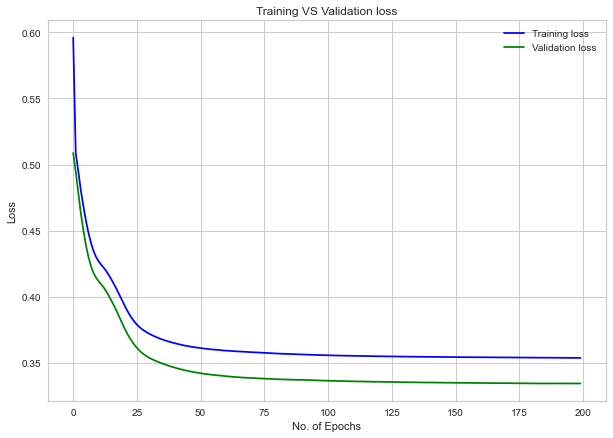

In [53]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training loss vs Validation accuracy

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')


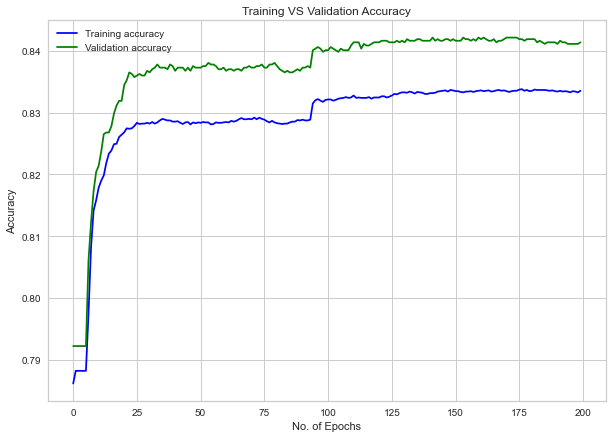

In [54]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')
plt.title('Training VS Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evaluation

In [55]:
train_acc = best_model.evaluate(X_train, y_train, verbose=1)
print("Final Training Loss    : ", train_acc[0])
print("Final Training Accuracy: ", train_acc[1])

test_acc = best_model.evaluate(X_test, y_test, verbose=1)
print("Final Test Loss    : ", test_acc[0])
print("Final Test Accuracy: ", test_acc[1])

489/489 [==============================] - 0s 599us/step - loss: 0.3539 - accuracy: 0.8322
Final Training Loss    :  0.3539409637451172
Final Training Accuracy:  0.8322349190711975
123/123 [==============================] - 0s 615us/step - loss: 0.3342 - accuracy: 0.8414
Final Test Loss    :  0.3341754972934723
Final Test Accuracy:  0.8413510918617249


In [56]:
ann_pred = best_model.predict(X_test)

123/123 [==============================] - 0s 508us/step


In [57]:
ann_pred = np.where(ann_pred <= 0.5, 0, 1)
ann_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

         0.0       0.70      0.41      0.52       812
         1.0       0.86      0.95      0.90      3096

    accuracy                           0.84      3908
   macro avg       0.78      0.68      0.71      3908
weighted avg       0.83      0.84      0.83      3908

AUC: 0.684


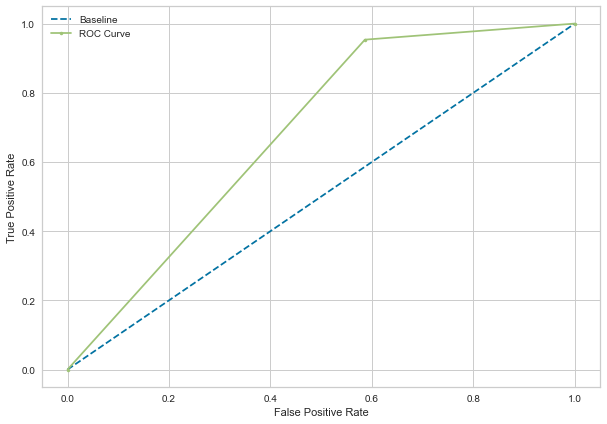

<AxesSubplot:>

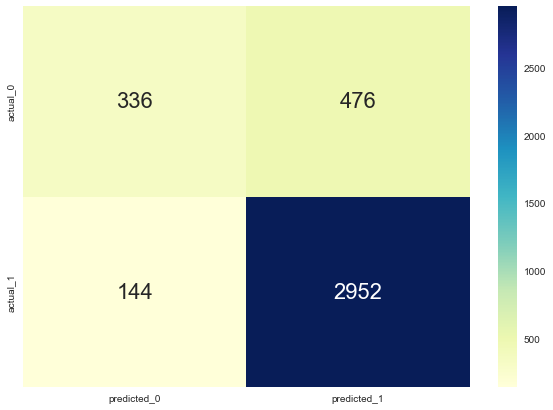

In [58]:
print(classification_report(y_test, ann_pred))

ann_cf = confusion_matrix(y_test, ann_pred)

# AUC
auc = roc_auc_score(y_test, ann_pred)
print('AUC: %.3f' % auc)

# ROC Curve
ns_probs = [0 for _ in range(len(y_test))]
    
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, ann_pred)
    
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Heatmap
sns.heatmap(ann_cf, xticklabels=['predicted_0', 'predicted_1'], yticklabels=['actual_0', 'actual_1'],
annot=True, fmt='d', annot_kws={'fontsize':22}, cmap="YlGnBu")

# Solve Imbalanced Data Issue
- We will apply SMOTEENN resampling method on the original data to solve the imbalanced data issue.

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 1 - XGB Classifier</p>

In [59]:
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

X_resampled_train, y_resampled_train = resample.fit_resample(X_train, y_train)
x_resampled_test, y_resampled_test = resample.fit_resample(X_test, y_test)

In [60]:
# Train data
print("Resample X Train Data")
print("---------------------")
print(X_resampled_train)
print("\nResample Y Train Data")
print("---------------------")
print(y_resampled_train)

Resample X Train Data
---------------------
[[0.27777778 0.48265349 0.8        ... 0.         0.         0.41935484]
 [0.26388889 0.78837714 0.8        ... 0.         0.         0.52688172]
 [0.20833333 0.04069848 0.73333333 ... 0.         0.         0.47311828]
 ...
 [0.19444444 0.71293944 0.6        ... 0.         0.         0.41935484]
 [0.26388889 0.18390539 0.53333333 ... 0.         0.         0.41935484]
 [0.08333333 0.51984109 0.53333333 ... 0.         0.         0.41935484]]

Resample Y Train Data
---------------------
[0. 0. 0. ... 1. 1. 1.]


In [61]:
# Test data
print("Resample X Test Data")
print("--------------------")
print(x_resampled_test)
print("\nResample Y Test Data")
print("--------------------")
print(y_resampled_test)

Resample X Test Data
--------------------
[[0.48611111 0.37594124 1.         ... 0.         0.         0.41935484]
 [0.18055556 0.26557953 0.86666667 ... 0.         0.         0.47311828]
 [0.33333333 0.39645216 0.66666667 ... 0.         0.         0.41935484]
 ...
 [0.22222222 0.97528526 0.53333333 ... 0.         0.         0.41935484]
 [0.         0.7231487  0.4        ... 0.         0.         0.41935484]
 [0.47222222 0.2910334  0.53333333 ... 0.         0.         0.41935484]]

Resample Y Test Data
--------------------
[0. 0. 0. ... 1. 1. 1.]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2434
           1       0.94      0.95      0.94      2138

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572

AUC: 0.947


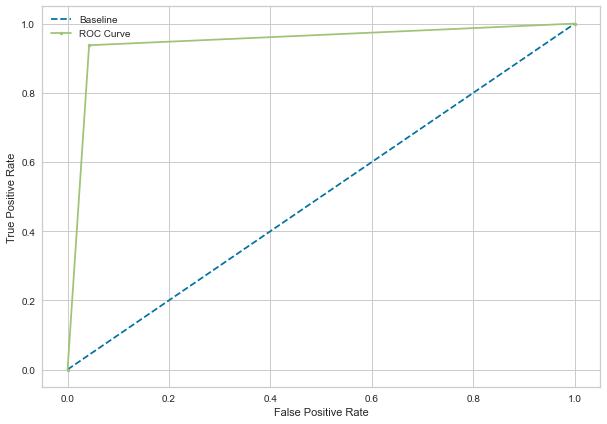

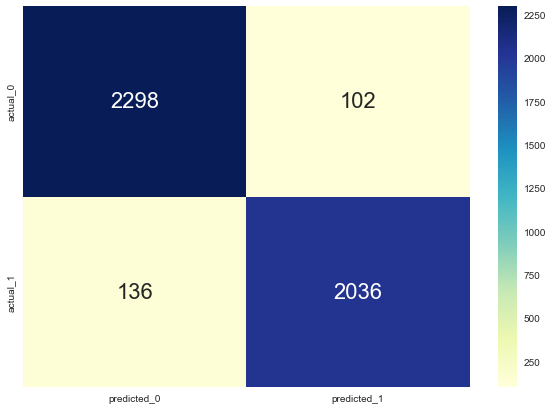

In [62]:
xg.fit(X_resampled_train, y_resampled_train)

y_predxg = xg.predict(x_resampled_test)

classificationResults(xg, y_predxg, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 2 - Random Forest Classifier</p>

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2361
         1.0       0.93      0.92      0.92      2211

    accuracy                           0.93      4572
   macro avg       0.93      0.93      0.93      4572
weighted avg       0.93      0.93      0.93      4572

AUC: 0.928


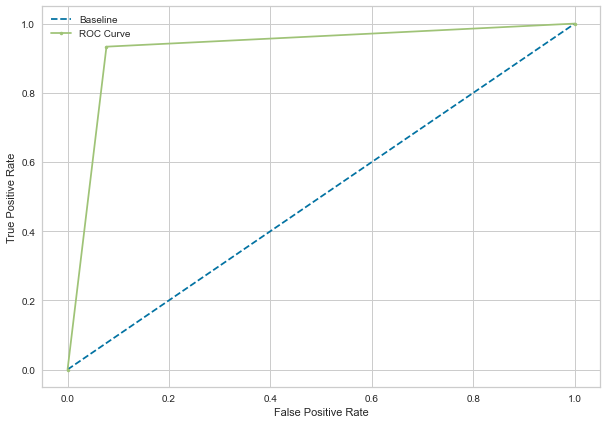

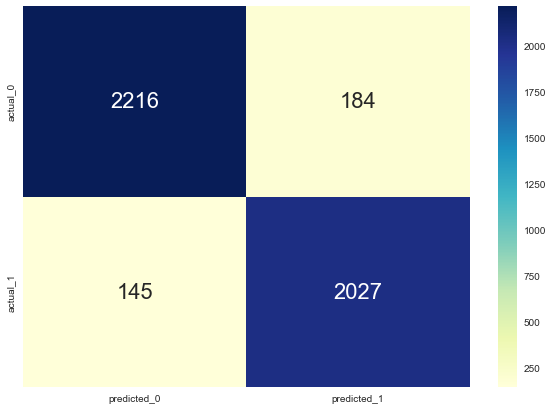

In [63]:
rf.fit(X_resampled_train, y_resampled_train)

y_predrf = rf.predict(x_resampled_test)

classificationResults(rf, y_predrf, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 3 - Cat Boost Classifier</p>

Learning rate set to 0.034568
0:	learn: 0.6395679	total: 4.81ms	remaining: 4.81s
1:	learn: 0.5901560	total: 9.58ms	remaining: 4.78s
2:	learn: 0.5516570	total: 14.7ms	remaining: 4.87s
3:	learn: 0.5148826	total: 19.9ms	remaining: 4.94s
4:	learn: 0.4845361	total: 25.2ms	remaining: 5.01s
5:	learn: 0.4525909	total: 30.8ms	remaining: 5.1s
6:	learn: 0.4274732	total: 36.6ms	remaining: 5.19s
7:	learn: 0.4068402	total: 42.1ms	remaining: 5.22s
8:	learn: 0.3893892	total: 47.9ms	remaining: 5.28s
9:	learn: 0.3700145	total: 53.9ms	remaining: 5.34s
10:	learn: 0.3524237	total: 59.6ms	remaining: 5.36s
11:	learn: 0.3392241	total: 65.8ms	remaining: 5.42s
12:	learn: 0.3253865	total: 71.8ms	remaining: 5.45s
13:	learn: 0.3128783	total: 77.9ms	remaining: 5.49s
14:	learn: 0.3047907	total: 83.9ms	remaining: 5.51s
15:	learn: 0.2964967	total: 89.6ms	remaining: 5.51s
16:	learn: 0.2874686	total: 95.5ms	remaining: 5.52s
17:	learn: 0.2823142	total: 102ms	remaining: 5.56s
18:	learn: 0.2750761	total: 107ms	remaining: 5

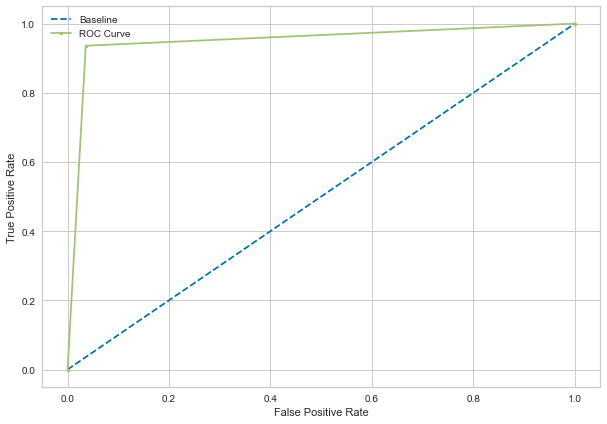

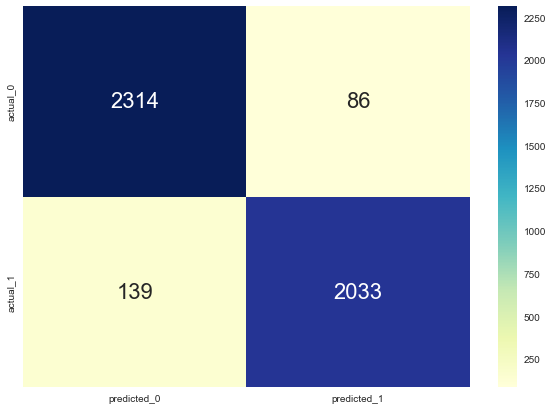

In [64]:
catt.fit(X_resampled_train, y_resampled_train)

y_predc = catt.predict(x_resampled_test)

classificationResults(catt, y_predc, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 4 - Logistic Regression</p>

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      2429
         1.0       0.80      0.81      0.80      2143

    accuracy                           0.81      4572
   macro avg       0.81      0.81      0.81      4572
weighted avg       0.81      0.81      0.81      4572

AUC: 0.814


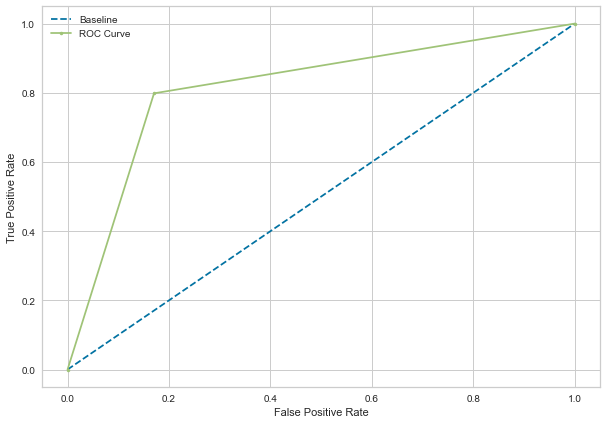

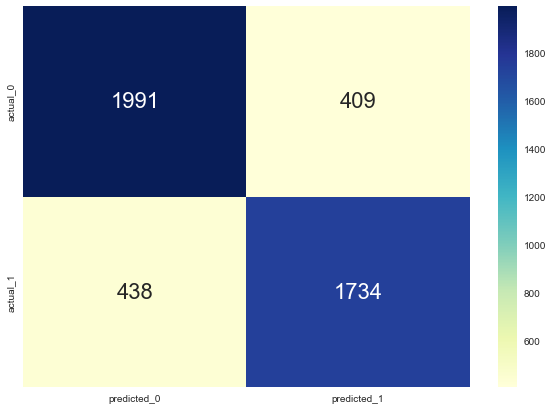

In [65]:
lr.fit(X_resampled_train, y_resampled_train)

prediction_lr = lr.predict(x_resampled_test)

classificationResults(lr, prediction_lr, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 5 - Ada Boost Classifier</p>

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      2429
         1.0       0.80      0.81      0.80      2143

    accuracy                           0.81      4572
   macro avg       0.81      0.81      0.81      4572
weighted avg       0.81      0.81      0.81      4572

AUC: 0.814


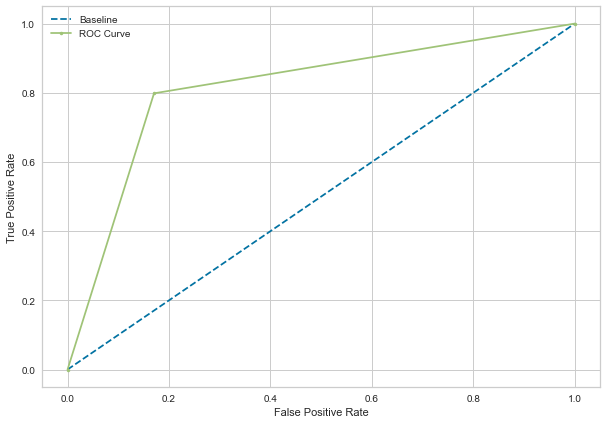

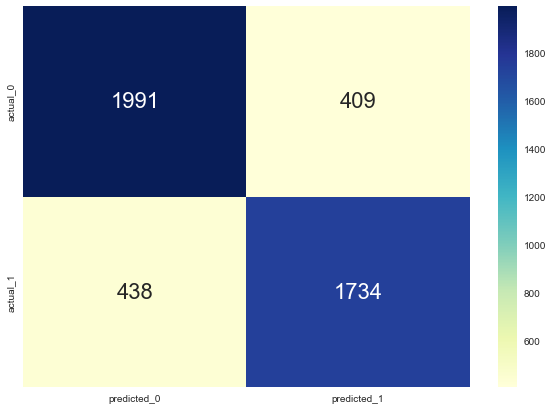

In [66]:
ada.fit(X_resampled_train, y_resampled_train)

prediction_ada = lr.predict(x_resampled_test)

classificationResults(ada, prediction_ada, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 6 - Gaussian Naive Bayes</p>

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2434
         1.0       0.81      0.83      0.82      2138

    accuracy                           0.83      4572
   macro avg       0.83      0.83      0.83      4572
weighted avg       0.83      0.83      0.83      4572

AUC: 0.829


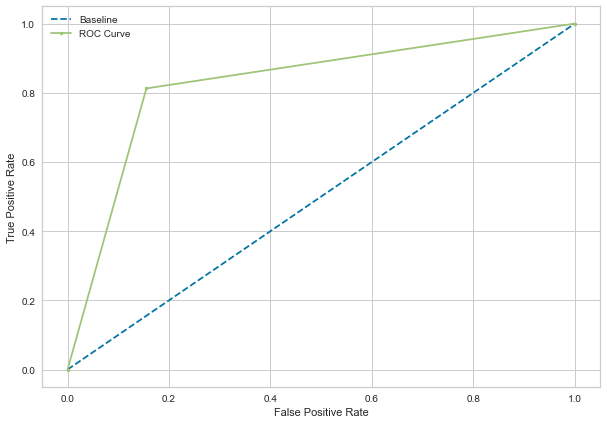

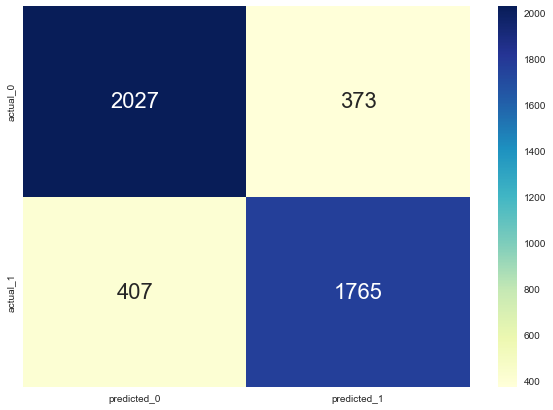

In [67]:
gnb.fit(X_resampled_train, y_resampled_train)

prediction_gnb = gnb.predict(x_resampled_test)

classificationResults(gnb, prediction_gnb, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Resample Model 7 - Artificial Neural Network</p>

In [68]:
best_model.fit(X_resampled_train, y_resampled_train, epochs=200, verbose=1, shuffle=False, batch_size=64, 
                      validation_data=(x_resampled_test, y_resampled_test), validation_split=0.33)

Epoch 1/200
267/267 [==============================] - 0s 989us/step - loss: 0.1538 - accuracy: 0.9472 - val_loss: 1.7233 - val_accuracy: 0.4762
Epoch 2/200
267/267 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9129 - val_loss: 1.0634 - val_accuracy: 0.5101
Epoch 3/200
267/267 [==============================] - 0s 902us/step - loss: 0.2142 - accuracy: 0.9188 - val_loss: 0.9188 - val_accuracy: 0.5641
Epoch 4/200
267/267 [==============================] - 0s 880us/step - loss: 0.2139 - accuracy: 0.9191 - val_loss: 0.8440 - val_accuracy: 0.5965
Epoch 5/200
267/267 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9187 - val_loss: 0.7961 - val_accuracy: 0.6216
Epoch 6/200
267/267 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9185 - val_loss: 0.7642 - val_accuracy: 0.6360
Epoch 7/200
267/267 [==============================] - 0s 873us/step - loss: 0.2145 - accuracy: 0.9183 - val_loss: 0.7414 - val_accuracy

# Training loss vs Validation loss

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')


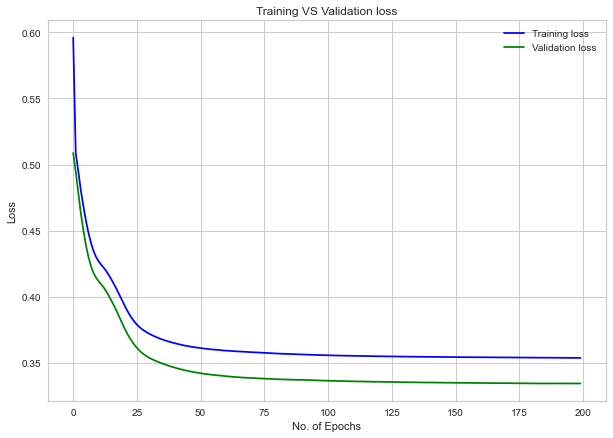

In [69]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training loss vs Validation accuracy

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')


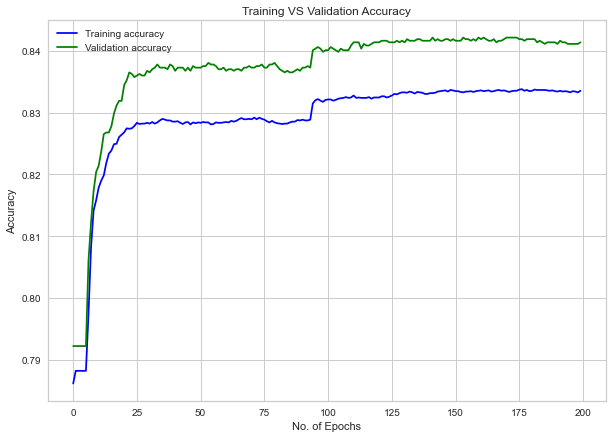

In [70]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')
plt.title('Training VS Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
ann_pred = best_model.predict(x_resampled_test)

143/143 [==============================] - 0s 523us/step


In [72]:
ann_pred = np.where(ann_pred <= 0.5, 0, 1)
ann_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

         0.0       0.99      0.54      0.70      2400
         1.0       0.66      0.99      0.79      2172

    accuracy                           0.76      4572
   macro avg       0.83      0.77      0.75      4572
weighted avg       0.83      0.76      0.74      4572

AUC: 0.767


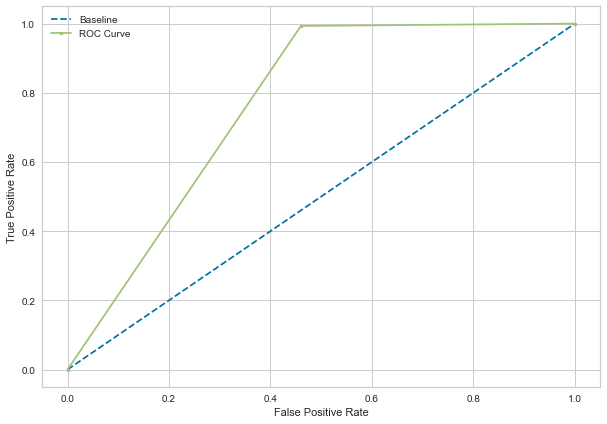

<AxesSubplot:>

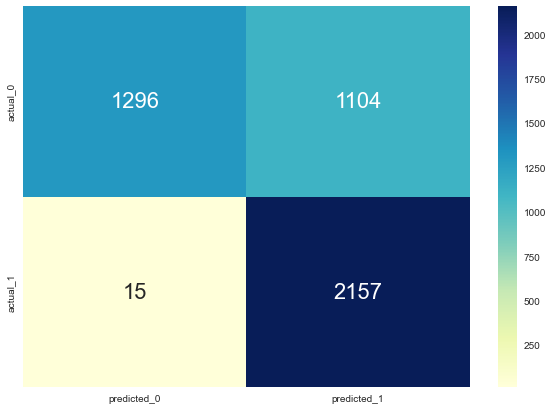

In [73]:
print(classification_report(y_resampled_test, ann_pred))

ann_cf = confusion_matrix(y_resampled_test, ann_pred)

# AUC
auc = roc_auc_score(y_resampled_test, ann_pred)
print('AUC: %.3f' % auc)

# ROC Curve
ns_probs = [0 for _ in range(len(y_resampled_test))]
    
ns_fpr, ns_tpr, _ = roc_curve(y_resampled_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_resampled_test, ann_pred)
    
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Heatmap
sns.heatmap(ann_cf, xticklabels=['predicted_0', 'predicted_1'], yticklabels=['actual_0', 'actual_1'],
annot=True, fmt='d', annot_kws={'fontsize':22}, cmap="YlGnBu")

# Model Hyperparameter Tuning

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 1 - XGB Classifier</p>

In [74]:
param_grid_xg = {
    'max_depth': [1, 3, 5, 7, 9],
    'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_lambda' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 150, 200, 250, 300]
}

In [75]:
ran_search_xg = RandomizedSearchCV(estimator = xg, param_distributions = param_grid_xg, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_xg.fit(X_resampled_train, y_resampled_train)
ran_search_xg.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'reg_lambda': 0.5,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 9,
 'gamma': 4,
 'colsample_bytree': 0.7}

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2458
           1       0.93      0.96      0.95      2114

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572

AUC: 0.949


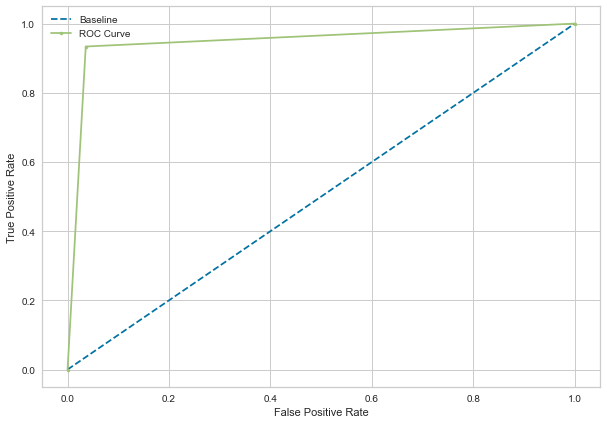

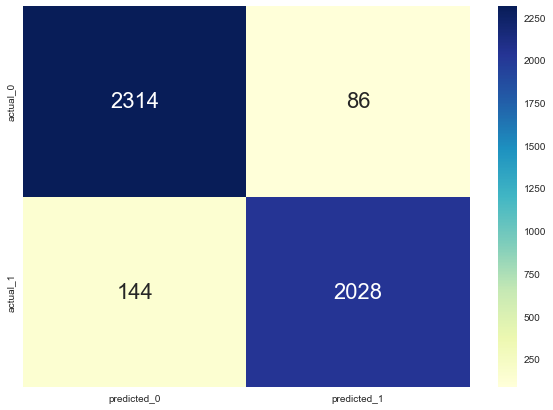

In [76]:
xgb = XGBClassifier(colsample_bytree=ran_search_xg.best_params_['colsample_bytree'], 
                  gamma=ran_search_xg.best_params_['gamma'], max_depth=int(ran_search_xg.best_params_['max_depth']),
                  min_child_weight=ran_search_xg.best_params_['min_child_weight'], 
                  reg_lambda=ran_search_xg.best_params_['reg_lambda'])

xgb.fit(X_resampled_train, y_resampled_train)

y_predxgb = xgb.predict(x_resampled_test)

classificationResults(xgb, y_predxgb, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 2 - Random Forest Classifier</p>

In [77]:
param_grid_rf = {
    'n_estimators': [10, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2']
}

In [78]:
ran_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_rf, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_rf.fit(X_resampled_train, y_resampled_train)
ran_search_rf.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'gini'}

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      2529
         1.0       0.90      0.96      0.93      2043

    accuracy                           0.94      4572
   macro avg       0.93      0.94      0.93      4572
weighted avg       0.94      0.94      0.94      4572

AUC: 0.933


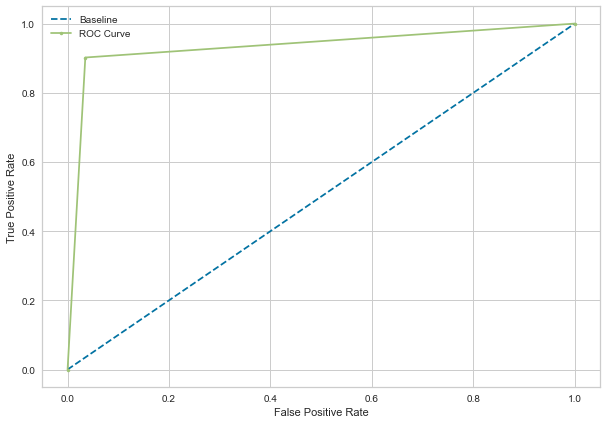

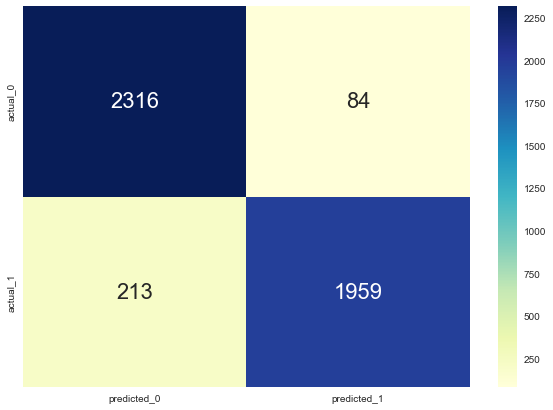

In [79]:
rf = RandomForestClassifier(n_estimators=ran_search_rf.best_params_['n_estimators'], 
                  max_depth=ran_search_rf.best_params_['max_depth'], 
                  criterion=ran_search_rf.best_params_['criterion'],
                  min_samples_split=ran_search_rf.best_params_['min_samples_split'],
                  min_samples_leaf=ran_search_rf.best_params_['min_samples_leaf'],
                  max_features=ran_search_rf.best_params_['max_features']
                )

rf.fit(X_resampled_train, y_resampled_train)

y_predrf = rf.predict(x_resampled_test)

classificationResults(rf, y_predrf, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 3 - Cat Boost Classifier</p>

In [80]:
param_grid_catt = {
    'iterations': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'depth': [6, 7, 8, 9, 10]
}

In [81]:
ran_search_catt = RandomizedSearchCV(estimator = catt, param_distributions = param_grid_catt, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_catt.fit(X_resampled_train, y_resampled_train)
ran_search_catt.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0:	learn: 0.3246557	total: 3.04ms	remaining: 21.3ms
1:	learn: 0.2408852	total: 5.97ms	remaining: 17.9ms
2:	learn: 0.2146035	total: 8.78ms	remaining: 14.6ms
3:	learn: 0.2008611	total: 11.6ms	remaining: 11.6ms
4:	learn: 0.1905597	total: 14.6ms	remaining: 8.76ms
5:	learn: 0.1843884	total: 17.4ms	remaining: 5.8ms
6:	learn: 0.1801633	total: 20.4ms	remaining: 2.91ms
7:	learn: 0.1780331	total: 23.6ms	remaining: 0us


{'learning_rate': 0.9, 'iterations': 8, 'depth': 6}

0:	learn: 0.3246557	total: 3.27ms	remaining: 22.9ms
1:	learn: 0.2408852	total: 6.31ms	remaining: 18.9ms
2:	learn: 0.2146035	total: 9.2ms	remaining: 15.3ms
3:	learn: 0.2008611	total: 12.1ms	remaining: 12.1ms
4:	learn: 0.1905597	total: 15.4ms	remaining: 9.25ms
5:	learn: 0.1843884	total: 18.6ms	remaining: 6.21ms
6:	learn: 0.1801633	total: 21.6ms	remaining: 3.09ms
7:	learn: 0.1780331	total: 25ms	remaining: 0us
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      2499
         1.0       0.91      0.95      0.93      2073

    accuracy                           0.93      4572
   macro avg       0.93      0.94      0.93      4572
weighted avg       0.94      0.93      0.93      4572

AUC: 0.933


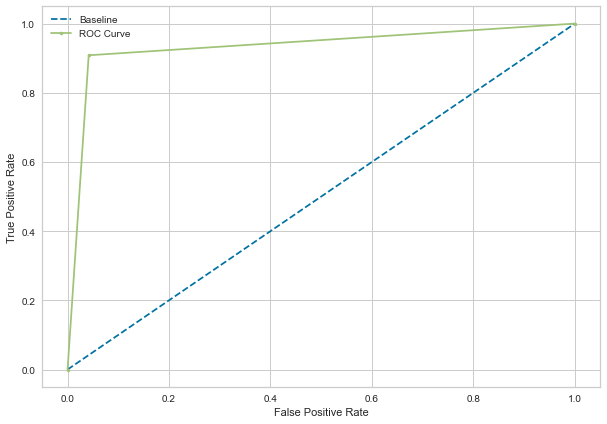

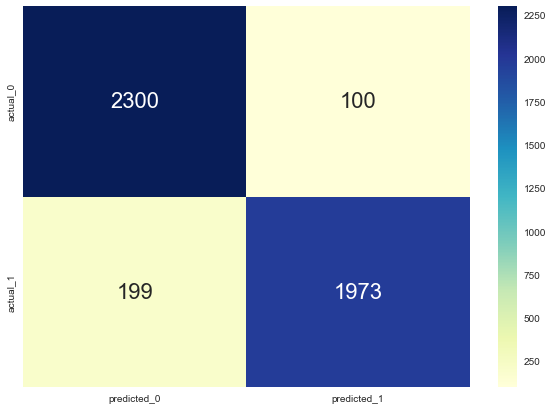

In [82]:
catt = CatBoostClassifier(iterations=ran_search_catt.best_params_['iterations'], 
                  learning_rate=ran_search_catt.best_params_['learning_rate'], 
                  depth=ran_search_catt.best_params_['depth'])

catt.fit(X_resampled_train, y_resampled_train)

y_predcatt = catt.predict(x_resampled_test)

classificationResults(catt, y_predcatt, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 4 - Logistic Regression</p>

In [83]:
param_grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['li', 'l2', 'elasticnet', 'none'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

In [84]:
ran_search_lr = RandomizedSearchCV(estimator = lr, param_distributions = param_grid_lr, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_lr.fit(X_resampled_train, y_resampled_train)
ran_search_lr.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Benon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Benon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Benon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Benon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueE

{'solver': 'lbfgs', 'penalty': 'none', 'C': 100}

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      2426
         1.0       0.80      0.81      0.81      2146

    accuracy                           0.82      4572
   macro avg       0.82      0.82      0.82      4572
weighted avg       0.82      0.82      0.82      4572

AUC: 0.815


C:\Users\Benon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


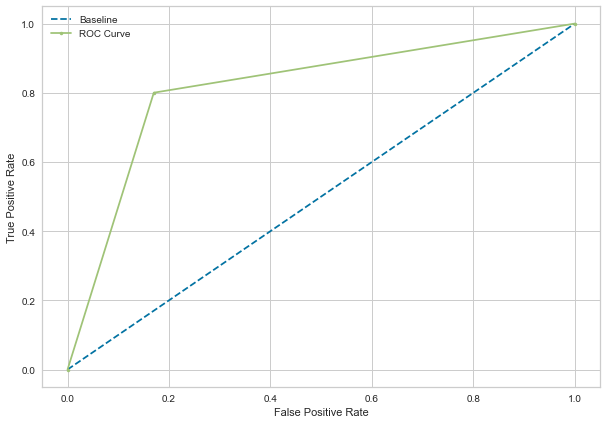

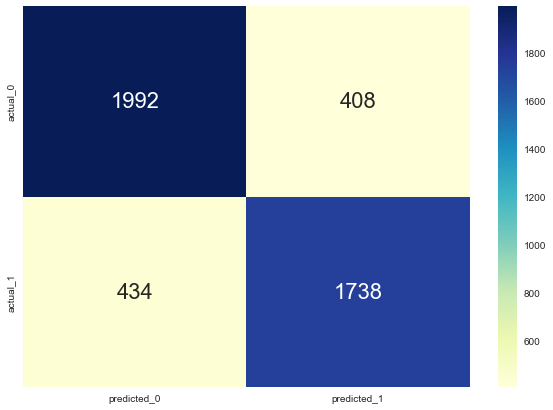

In [85]:
lr = LogisticRegression(solver=ran_search_lr.best_params_['solver'], 
                  penalty=ran_search_lr.best_params_['penalty'], 
                  C=ran_search_lr.best_params_['C'])

lr.fit(X_resampled_train, y_resampled_train)

y_predlr = lr.predict(x_resampled_test)

classificationResults(lr, y_predlr, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 5 - Ada Boost Classifier</p>

In [86]:
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [87]:
ran_search_ada = RandomizedSearchCV(estimator = ada, param_distributions = param_grid_ada, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_ada.fit(X_resampled_train, y_resampled_train)
ran_search_ada.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'n_estimators': 250, 'learning_rate': 0.9, 'algorithm': 'SAMME.R'}

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      2516
         1.0       0.92      0.97      0.94      2056

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572

AUC: 0.947


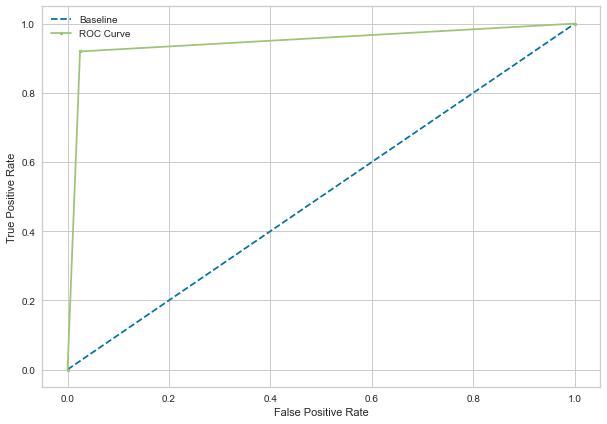

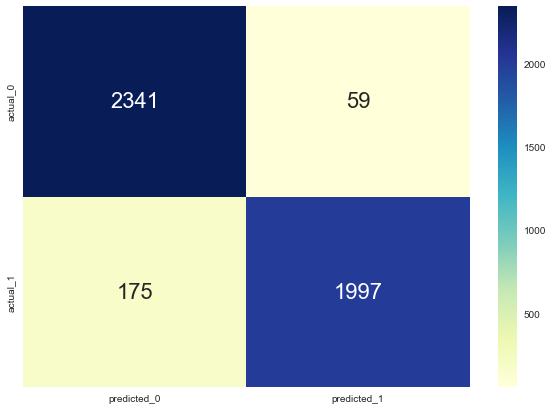

In [88]:
ada = AdaBoostClassifier(n_estimators=ran_search_ada.best_params_['n_estimators'], 
                  learning_rate=ran_search_ada.best_params_['learning_rate'], 
                  algorithm=ran_search_ada.best_params_['algorithm'])

ada.fit(X_resampled_train, y_resampled_train)

y_predada = ada.predict(x_resampled_test)

classificationResults(ada, y_predada, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 6 - Gaussian Naive Bayes</p>

In [89]:
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [90]:
ran_search_gnb = RandomizedSearchCV(estimator = gnb, param_distributions = param_grid_gnb, cv = 3, 
                           n_iter = 5, n_jobs = -1, verbose = 2)

ran_search_gnb.fit(X_resampled_train, y_resampled_train)
ran_search_gnb.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'var_smoothing': 1e-05}

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2434
         1.0       0.81      0.83      0.82      2138

    accuracy                           0.83      4572
   macro avg       0.83      0.83      0.83      4572
weighted avg       0.83      0.83      0.83      4572

AUC: 0.829


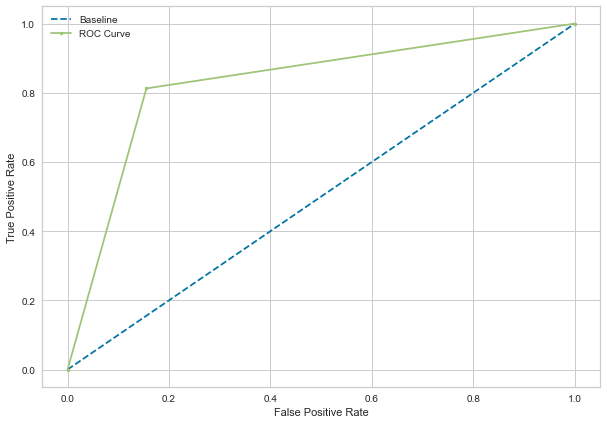

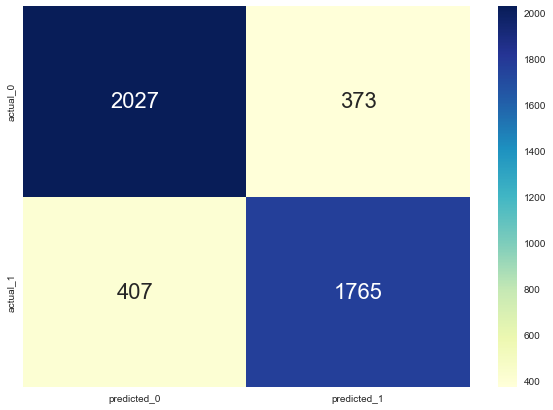

In [91]:
gnb = GaussianNB(var_smoothing=ran_search_gnb.best_params_['var_smoothing'])

gnb.fit(X_resampled_train, y_resampled_train)

y_predgnb = gnb.predict(x_resampled_test)

classificationResults(gnb, y_predgnb, y_resampled_test)

<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Hyperparameter Tuning for Model 7 - Artificial Neural Network</p>

In [92]:
def build_ann(hp):
    DenseUnits = hp.Int('DenseUnits', min_value=1, max_value=15, step=1)
    
    model = Sequential()

    model.add(Dense(units=10, input_dim=7, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=DenseUnits, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [93]:
tuner = keras_tuner.RandomSearch(
    build_ann,
    objective="val_accuracy",
    max_trials=5,
    directory="results",
    project_name="custom_training",
    overwrite=True
)

tuner.search(X_resampled_train, y_resampled_train, epochs=10, validation_data=(x_resampled_test, y_resampled_test))

best_model = tuner.get_best_models()[0]
best_hps = tuner.get_best_hyperparameters()[0]
checkpoint = tf.train.Checkpoint(best_model)
save_path = checkpoint.save('/tmp/training_checkpoints')
checkpoint.restore(save_path)

print(best_hps.values)

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.9282589554786682

Best val_accuracy So Far: 0.9289151430130005
Total elapsed time: 00h 00m 29s
INFO:tensorflow:Oracle triggered exit
{'DenseUnits': 13}


In [94]:
best_model.fit(X_resampled_train, y_resampled_train, epochs=200, verbose=1, shuffle=False, batch_size=64, 
                      validation_data=(x_resampled_test, y_resampled_test), validation_split=0.33)

Epoch 1/200
267/267 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.9699 - val_loss: 2.0850 - val_accuracy: 0.4766
Epoch 2/200
267/267 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9300 - val_loss: 1.2380 - val_accuracy: 0.5190
Epoch 3/200
267/267 [==============================] - 0s 901us/step - loss: 0.1814 - accuracy: 0.9318 - val_loss: 1.0480 - val_accuracy: 0.5696
Epoch 4/200
267/267 [==============================] - 0s 951us/step - loss: 0.1812 - accuracy: 0.9305 - val_loss: 0.9619 - val_accuracy: 0.5890
Epoch 5/200
267/267 [==============================] - 0s 899us/step - loss: 0.1836 - accuracy: 0.9287 - val_loss: 0.9052 - val_accuracy: 0.6070
Epoch 6/200
267/267 [==============================] - 0s 976us/step - loss: 0.1864 - accuracy: 0.9260 - val_loss: 0.8582 - val_accuracy: 0.6177
Epoch 7/200
267/267 [==============================] - 0s 892us/step - loss: 0.1887 - accuracy: 0.9249 - val_loss: 0.8272 - val_accura

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\3780133465.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')


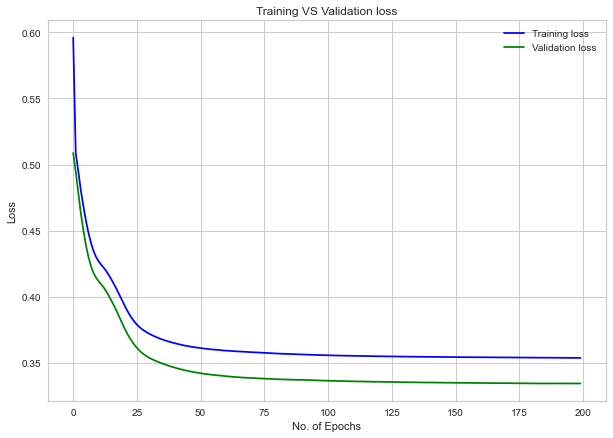

In [95]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['loss'], 'r', label='Training loss', color='blue')
plt.plot(ann_model.history['val_loss'], 'g', label='Validation loss', color='green')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.792156862745098, 0.043137254901960784, 0.011764705882352941, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
C:\Users\Benon\AppData\Local\Temp\ipykernel_4472\2276782262.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.6235294117647059, 0.7647058823529411, 0.4666666666666667, 1)). The keyword argument will take precedence.
  plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')


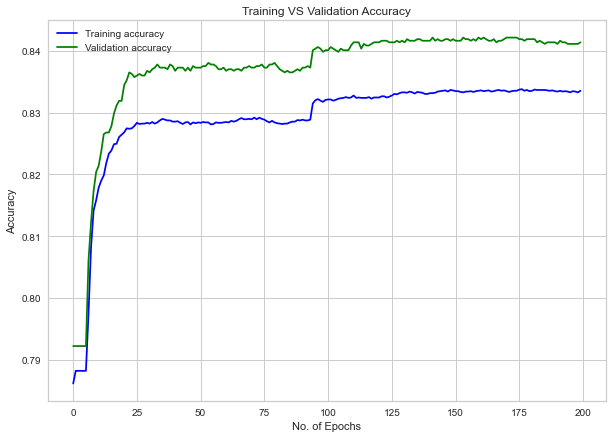

In [96]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(ann_model.history['accuracy'], 'r', label='Training accuracy', color='blue')
plt.plot(ann_model.history['val_accuracy'], 'g', label='Validation accuracy', color='green')
plt.title('Training VS Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
ann_pred = best_model.predict(x_resampled_test)

143/143 [==============================] - 0s 521us/step


In [98]:
ann_pred = np.where(ann_pred <= 0.5, 0, 1)
ann_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      2400
         1.0       0.74      0.98      0.84      2172

    accuracy                           0.83      4572
   macro avg       0.86      0.84      0.83      4572
weighted avg       0.86      0.83      0.83      4572

AUC: 0.835


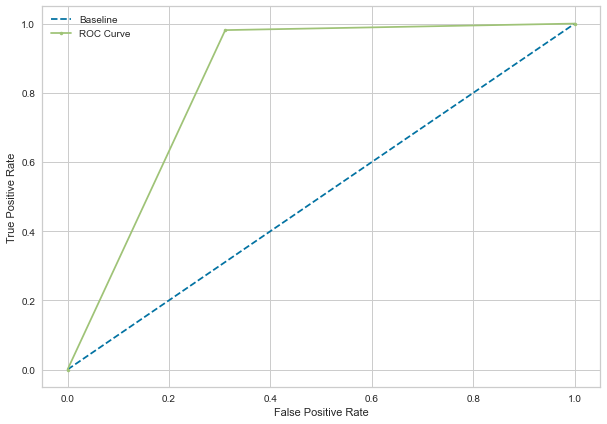

<AxesSubplot:>

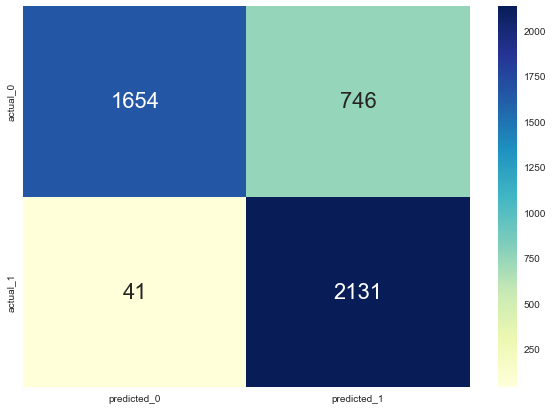

In [99]:
print(classification_report(y_resampled_test, ann_pred))

ann_cf = confusion_matrix(y_resampled_test, ann_pred)

# AUC
auc = roc_auc_score(y_resampled_test, ann_pred)
print('AUC: %.3f' % auc)

# ROC Curve
ns_probs = [0 for _ in range(len(y_resampled_test))]
    
ns_fpr, ns_tpr, _ = roc_curve(y_resampled_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_resampled_test, ann_pred)
    
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Heatmap
sns.heatmap(ann_cf, xticklabels=['predicted_0', 'predicted_1'], yticklabels=['actual_0', 'actual_1'],
annot=True, fmt='d', annot_kws={'fontsize':22}, cmap="YlGnBu")

# In conclusion, after carrying out resampling & hyperparameter tuning on all the models, XGBClassifier is deemed the best performing model.

# Part 2 - Clustering
Our objective is to cluster the data into clusters using the clustering stated below, and eventually evaluate their results.
- DBScan
- KMeans
- Agglomerative 

*Silhouetter score will be used to evaluate the results of clustering. The closer the value of silhouetter score to 1, the better it is. -1 is the worse.

In [100]:
newData.drop(data.columns[14], axis=1, inplace=True)
newData.head(5)

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week
2,0.291667,0.650714,0.533333,0.2,0.0,0.0,0.419355
3,0.500000,0.708458,0.400000,0.0,0.0,0.0,0.419355
4,0.152778,0.894119,0.800000,1.0,0.0,0.0,0.419355
5,0.277778,0.817665,0.866667,1.0,0.0,0.0,0.419355
7,0.486111,0.629186,0.533333,0.0,0.0,0.0,0.473118


<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Clustering Model 1 - DBScan</p>

In [120]:
def tuneDBScan():
    for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        dbscan = DBSCAN(eps=i, min_samples=15).fit(newData)
        
        n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        if(n_clusters_ > 1):
            score = silhouette_score(newData, dbscan.labels_, metric='euclidean')
        
            print('No. of epsilon: ', i,' Silhouetter Score: %.3f' % score)
        
tuneDBScan()

No. of epsilon:  0.1  Silhouetter Score: 0.013
No. of epsilon:  0.2  Silhouetter Score: 0.353


Since epsilon=0.2 gives the highest silhouetter score, hence epsilon=0.2 is the optimal no. of clusters.

In [121]:
dbscan = DBSCAN(eps=0.2, min_samples=25).fit(newData)

noClus = set(dbscan.labels_)

# Number of clusters
noClus

{-1, 0, 1}

In [122]:
# Display number of groups under all the clusters
Counter(dbscan.labels_)

Counter({0: 13666, 1: 5831, -1: 40})

In [123]:
score = silhouette_score(newData, dbscan.labels_, metric='euclidean')
        
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.345


<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Clustering Model 2 - KMeans Clustering</p>

In [124]:
# Determine the optimal number of clusters (Highest silhouetter score)
def kmeansClus():
    for i in range(2, 20):
        km = KMeans(n_clusters=i, random_state=42)
        km.fit_predict(newData)
        
        score = silhouette_score(newData, km.labels_, metric='euclidean')
        
        print("Cluster no", i, ": ", 'Silhouetter Score: %.3f' % score)

In [125]:
kmeansClus()

Cluster no 2 :  Silhouetter Score: 0.384
Cluster no 3 :  Silhouetter Score: 0.336
Cluster no 4 :  Silhouetter Score: 0.321
Cluster no 5 :  Silhouetter Score: 0.250
Cluster no 6 :  Silhouetter Score: 0.251
Cluster no 7 :  Silhouetter Score: 0.235
Cluster no 8 :  Silhouetter Score: 0.228
Cluster no 9 :  Silhouetter Score: 0.236
Cluster no 10 :  Silhouetter Score: 0.231
Cluster no 11 :  Silhouetter Score: 0.231
Cluster no 12 :  Silhouetter Score: 0.231
Cluster no 13 :  Silhouetter Score: 0.229
Cluster no 14 :  Silhouetter Score: 0.220
Cluster no 15 :  Silhouetter Score: 0.220
Cluster no 16 :  Silhouetter Score: 0.214
Cluster no 17 :  Silhouetter Score: 0.221
Cluster no 18 :  Silhouetter Score: 0.215
Cluster no 19 :  Silhouetter Score: 0.223


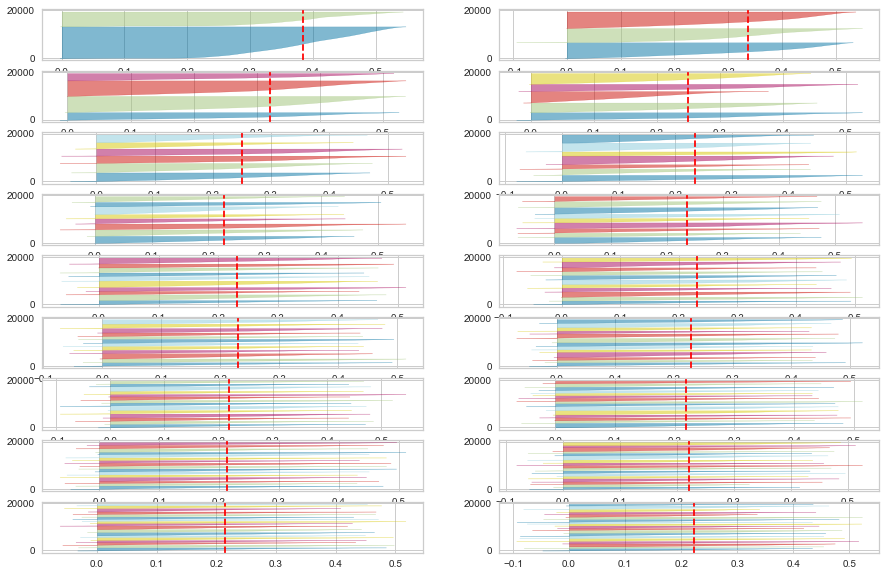

In [126]:
# Might take a very long time to run
fig, ax = plt.subplots(9, 2, figsize=(20, 10))

for i in range(2, 20):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Since cluster=2 gives the highest Silhouetter score, we believe that n_clusters=2 is the optimal parameter for our KMeans clustering model.

In [127]:
km = KMeans(n_clusters=2, random_state=42)

label = km.fit_predict(newData)

In [128]:
score = silhouette_score(newData, km.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.384


<p style="background-color:pink;font-family: monospace;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Clustering Model 3 - Agglomerative Clustering</p>

In [129]:
def aggloClus():
    for i in range(2, 20):
        agg = AgglomerativeClustering(n_clusters=i, linkage="ward")
        agg.fit_predict(newData)
        
        score = silhouette_score(newData, agg.labels_, metric='euclidean')
            
        print("Cluster no", i, ": ", 'Silhouetter Score: %.3f' % score)

In [130]:
aggloClus()

Cluster no 2 :  Silhouetter Score: 0.382
Cluster no 3 :  Silhouetter Score: 0.295
Cluster no 4 :  Silhouetter Score: 0.275
Cluster no 5 :  Silhouetter Score: 0.204
Cluster no 6 :  Silhouetter Score: 0.208
Cluster no 7 :  Silhouetter Score: 0.191
Cluster no 8 :  Silhouetter Score: 0.177
Cluster no 9 :  Silhouetter Score: 0.180
Cluster no 10 :  Silhouetter Score: 0.171
Cluster no 11 :  Silhouetter Score: 0.172
Cluster no 12 :  Silhouetter Score: 0.171
Cluster no 13 :  Silhouetter Score: 0.172
Cluster no 14 :  Silhouetter Score: 0.168
Cluster no 15 :  Silhouetter Score: 0.169
Cluster no 16 :  Silhouetter Score: 0.169
Cluster no 17 :  Silhouetter Score: 0.170
Cluster no 18 :  Silhouetter Score: 0.164
Cluster no 19 :  Silhouetter Score: 0.162


The number of clusters will be determined by selecting the cluster with the highest silhouetter score.

In [131]:
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
agg.fit_predict(newData)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [132]:
score = silhouette_score(newData, agg.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.382


# In conclusion, KMeans Clustering is the best clustering method as it has the highest silhouetter score